In [1]:
import torch
import torch.nn as nn
from torch import optim
import torch.utils.data as data_utils
from data_loader import DataProvider
from model import VGG_FCN, InceptionV3
import shutil
from sklearn import metrics
import numpy as np
import torchvision.utils as vutils
import os
# from model import InceptionV3
import matplotlib.pyplot as plt
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [31]:
def worker_init_fn(worker_id):
    np.random.seed(np.random.get_state()[1][0] + worker_id)
    
val_loader = data_utils.DataLoader(dataset=DataProvider(val=True),
                                       batch_size=16, num_workers=3, worker_init_fn=worker_init_fn)


def data_gene(data_loader):
    for img, label in data_loader:
        yield img, label
        
g = data_gene(val_loader)

read file => /home/data/ACDC/Patch/115.txt
read file => /home/data/ACDC/Patch/63.txt
read file => /home/data/ACDC/Patch/34.txt
read file => /home/data/ACDC/Patch/108.txt
read file => /home/data/ACDC/Patch/8.txt
read file => /home/data/ACDC/Patch/101.txt
read file => /home/data/ACDC/Patch/41.txt
read file => /home/data/ACDC/Patch/87.txt
read file => /home/data/ACDC/Patch/77.txt
read file => /home/data/ACDC/Patch/72.txt
read file => /home/data/ACDC/Patch/135.txt
read file => /home/data/ACDC/Patch/52.txt
read file => /home/data/ACDC/Patch/74.txt
read file => /home/data/ACDC/Patch/55.txt
read file => /home/data/ACDC/Patch/64.txt
read file => /home/data/ACDC/Patch/38.txt
read file => /home/data/ACDC/Patch/79.txt
read file => /home/data/ACDC/Patch/91.txt
read file => /home/data/ACDC/Patch/46.txt
read file => /home/data/ACDC/Patch/17.txt
read file => /home/data/ACDC/Patch/122.txt
read file => /home/data/ACDC/Patch/67.txt
read file => /home/data/ACDC/Patch/25.txt
read file => /home/data/ACDC/P

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fb1242bc208>>
Traceback (most recent call last):
  File "/home/power/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/power/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/power/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/power/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/power/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/power/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_

In [32]:
model = InceptionV3()
model = nn.DataParallel(model)

In [64]:
resume = '/home/hli/acdc_fcn/model_best.pth.tar'
checkpoint = torch.load(resume)
start_epoch = checkpoint['epoch']
best_acc = checkpoint['best_acc']
model.load_state_dict(checkpoint['state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer'])
print("=> loaded checkpoint '{}' (epoch {})"
      .format(resume, checkpoint['epoch']))



RuntimeError: Error(s) in loading state_dict for DataParallel:
	Missing key(s) in state_dict: "module.net.Conv2d_1a_3x3.conv.weight", "module.net.Conv2d_1a_3x3.bn.weight", "module.net.Conv2d_1a_3x3.bn.bias", "module.net.Conv2d_1a_3x3.bn.running_mean", "module.net.Conv2d_1a_3x3.bn.running_var", "module.net.Conv2d_2a_3x3.conv.weight", "module.net.Conv2d_2a_3x3.bn.weight", "module.net.Conv2d_2a_3x3.bn.bias", "module.net.Conv2d_2a_3x3.bn.running_mean", "module.net.Conv2d_2a_3x3.bn.running_var", "module.net.Conv2d_2b_3x3.conv.weight", "module.net.Conv2d_2b_3x3.bn.weight", "module.net.Conv2d_2b_3x3.bn.bias", "module.net.Conv2d_2b_3x3.bn.running_mean", "module.net.Conv2d_2b_3x3.bn.running_var", "module.net.Conv2d_3b_1x1.conv.weight", "module.net.Conv2d_3b_1x1.bn.weight", "module.net.Conv2d_3b_1x1.bn.bias", "module.net.Conv2d_3b_1x1.bn.running_mean", "module.net.Conv2d_3b_1x1.bn.running_var", "module.net.Conv2d_4a_3x3.conv.weight", "module.net.Conv2d_4a_3x3.bn.weight", "module.net.Conv2d_4a_3x3.bn.bias", "module.net.Conv2d_4a_3x3.bn.running_mean", "module.net.Conv2d_4a_3x3.bn.running_var", "module.net.Mixed_5b.branch1x1.conv.weight", "module.net.Mixed_5b.branch1x1.bn.weight", "module.net.Mixed_5b.branch1x1.bn.bias", "module.net.Mixed_5b.branch1x1.bn.running_mean", "module.net.Mixed_5b.branch1x1.bn.running_var", "module.net.Mixed_5b.branch5x5_1.conv.weight", "module.net.Mixed_5b.branch5x5_1.bn.weight", "module.net.Mixed_5b.branch5x5_1.bn.bias", "module.net.Mixed_5b.branch5x5_1.bn.running_mean", "module.net.Mixed_5b.branch5x5_1.bn.running_var", "module.net.Mixed_5b.branch5x5_2.conv.weight", "module.net.Mixed_5b.branch5x5_2.bn.weight", "module.net.Mixed_5b.branch5x5_2.bn.bias", "module.net.Mixed_5b.branch5x5_2.bn.running_mean", "module.net.Mixed_5b.branch5x5_2.bn.running_var", "module.net.Mixed_5b.branch3x3dbl_1.conv.weight", "module.net.Mixed_5b.branch3x3dbl_1.bn.weight", "module.net.Mixed_5b.branch3x3dbl_1.bn.bias", "module.net.Mixed_5b.branch3x3dbl_1.bn.running_mean", "module.net.Mixed_5b.branch3x3dbl_1.bn.running_var", "module.net.Mixed_5b.branch3x3dbl_2.conv.weight", "module.net.Mixed_5b.branch3x3dbl_2.bn.weight", "module.net.Mixed_5b.branch3x3dbl_2.bn.bias", "module.net.Mixed_5b.branch3x3dbl_2.bn.running_mean", "module.net.Mixed_5b.branch3x3dbl_2.bn.running_var", "module.net.Mixed_5b.branch3x3dbl_3.conv.weight", "module.net.Mixed_5b.branch3x3dbl_3.bn.weight", "module.net.Mixed_5b.branch3x3dbl_3.bn.bias", "module.net.Mixed_5b.branch3x3dbl_3.bn.running_mean", "module.net.Mixed_5b.branch3x3dbl_3.bn.running_var", "module.net.Mixed_5b.branch_pool.conv.weight", "module.net.Mixed_5b.branch_pool.bn.weight", "module.net.Mixed_5b.branch_pool.bn.bias", "module.net.Mixed_5b.branch_pool.bn.running_mean", "module.net.Mixed_5b.branch_pool.bn.running_var", "module.net.Mixed_5c.branch1x1.conv.weight", "module.net.Mixed_5c.branch1x1.bn.weight", "module.net.Mixed_5c.branch1x1.bn.bias", "module.net.Mixed_5c.branch1x1.bn.running_mean", "module.net.Mixed_5c.branch1x1.bn.running_var", "module.net.Mixed_5c.branch5x5_1.conv.weight", "module.net.Mixed_5c.branch5x5_1.bn.weight", "module.net.Mixed_5c.branch5x5_1.bn.bias", "module.net.Mixed_5c.branch5x5_1.bn.running_mean", "module.net.Mixed_5c.branch5x5_1.bn.running_var", "module.net.Mixed_5c.branch5x5_2.conv.weight", "module.net.Mixed_5c.branch5x5_2.bn.weight", "module.net.Mixed_5c.branch5x5_2.bn.bias", "module.net.Mixed_5c.branch5x5_2.bn.running_mean", "module.net.Mixed_5c.branch5x5_2.bn.running_var", "module.net.Mixed_5c.branch3x3dbl_1.conv.weight", "module.net.Mixed_5c.branch3x3dbl_1.bn.weight", "module.net.Mixed_5c.branch3x3dbl_1.bn.bias", "module.net.Mixed_5c.branch3x3dbl_1.bn.running_mean", "module.net.Mixed_5c.branch3x3dbl_1.bn.running_var", "module.net.Mixed_5c.branch3x3dbl_2.conv.weight", "module.net.Mixed_5c.branch3x3dbl_2.bn.weight", "module.net.Mixed_5c.branch3x3dbl_2.bn.bias", "module.net.Mixed_5c.branch3x3dbl_2.bn.running_mean", "module.net.Mixed_5c.branch3x3dbl_2.bn.running_var", "module.net.Mixed_5c.branch3x3dbl_3.conv.weight", "module.net.Mixed_5c.branch3x3dbl_3.bn.weight", "module.net.Mixed_5c.branch3x3dbl_3.bn.bias", "module.net.Mixed_5c.branch3x3dbl_3.bn.running_mean", "module.net.Mixed_5c.branch3x3dbl_3.bn.running_var", "module.net.Mixed_5c.branch_pool.conv.weight", "module.net.Mixed_5c.branch_pool.bn.weight", "module.net.Mixed_5c.branch_pool.bn.bias", "module.net.Mixed_5c.branch_pool.bn.running_mean", "module.net.Mixed_5c.branch_pool.bn.running_var", "module.net.Mixed_5d.branch1x1.conv.weight", "module.net.Mixed_5d.branch1x1.bn.weight", "module.net.Mixed_5d.branch1x1.bn.bias", "module.net.Mixed_5d.branch1x1.bn.running_mean", "module.net.Mixed_5d.branch1x1.bn.running_var", "module.net.Mixed_5d.branch5x5_1.conv.weight", "module.net.Mixed_5d.branch5x5_1.bn.weight", "module.net.Mixed_5d.branch5x5_1.bn.bias", "module.net.Mixed_5d.branch5x5_1.bn.running_mean", "module.net.Mixed_5d.branch5x5_1.bn.running_var", "module.net.Mixed_5d.branch5x5_2.conv.weight", "module.net.Mixed_5d.branch5x5_2.bn.weight", "module.net.Mixed_5d.branch5x5_2.bn.bias", "module.net.Mixed_5d.branch5x5_2.bn.running_mean", "module.net.Mixed_5d.branch5x5_2.bn.running_var", "module.net.Mixed_5d.branch3x3dbl_1.conv.weight", "module.net.Mixed_5d.branch3x3dbl_1.bn.weight", "module.net.Mixed_5d.branch3x3dbl_1.bn.bias", "module.net.Mixed_5d.branch3x3dbl_1.bn.running_mean", "module.net.Mixed_5d.branch3x3dbl_1.bn.running_var", "module.net.Mixed_5d.branch3x3dbl_2.conv.weight", "module.net.Mixed_5d.branch3x3dbl_2.bn.weight", "module.net.Mixed_5d.branch3x3dbl_2.bn.bias", "module.net.Mixed_5d.branch3x3dbl_2.bn.running_mean", "module.net.Mixed_5d.branch3x3dbl_2.bn.running_var", "module.net.Mixed_5d.branch3x3dbl_3.conv.weight", "module.net.Mixed_5d.branch3x3dbl_3.bn.weight", "module.net.Mixed_5d.branch3x3dbl_3.bn.bias", "module.net.Mixed_5d.branch3x3dbl_3.bn.running_mean", "module.net.Mixed_5d.branch3x3dbl_3.bn.running_var", "module.net.Mixed_5d.branch_pool.conv.weight", "module.net.Mixed_5d.branch_pool.bn.weight", "module.net.Mixed_5d.branch_pool.bn.bias", "module.net.Mixed_5d.branch_pool.bn.running_mean", "module.net.Mixed_5d.branch_pool.bn.running_var", "module.net.Mixed_6a.branch3x3.conv.weight", "module.net.Mixed_6a.branch3x3.bn.weight", "module.net.Mixed_6a.branch3x3.bn.bias", "module.net.Mixed_6a.branch3x3.bn.running_mean", "module.net.Mixed_6a.branch3x3.bn.running_var", "module.net.Mixed_6a.branch3x3dbl_1.conv.weight", "module.net.Mixed_6a.branch3x3dbl_1.bn.weight", "module.net.Mixed_6a.branch3x3dbl_1.bn.bias", "module.net.Mixed_6a.branch3x3dbl_1.bn.running_mean", "module.net.Mixed_6a.branch3x3dbl_1.bn.running_var", "module.net.Mixed_6a.branch3x3dbl_2.conv.weight", "module.net.Mixed_6a.branch3x3dbl_2.bn.weight", "module.net.Mixed_6a.branch3x3dbl_2.bn.bias", "module.net.Mixed_6a.branch3x3dbl_2.bn.running_mean", "module.net.Mixed_6a.branch3x3dbl_2.bn.running_var", "module.net.Mixed_6a.branch3x3dbl_3.conv.weight", "module.net.Mixed_6a.branch3x3dbl_3.bn.weight", "module.net.Mixed_6a.branch3x3dbl_3.bn.bias", "module.net.Mixed_6a.branch3x3dbl_3.bn.running_mean", "module.net.Mixed_6a.branch3x3dbl_3.bn.running_var", "module.net.Mixed_6b.branch1x1.conv.weight", "module.net.Mixed_6b.branch1x1.bn.weight", "module.net.Mixed_6b.branch1x1.bn.bias", "module.net.Mixed_6b.branch1x1.bn.running_mean", "module.net.Mixed_6b.branch1x1.bn.running_var", "module.net.Mixed_6b.branch7x7_1.conv.weight", "module.net.Mixed_6b.branch7x7_1.bn.weight", "module.net.Mixed_6b.branch7x7_1.bn.bias", "module.net.Mixed_6b.branch7x7_1.bn.running_mean", "module.net.Mixed_6b.branch7x7_1.bn.running_var", "module.net.Mixed_6b.branch7x7_2.conv.weight", "module.net.Mixed_6b.branch7x7_2.bn.weight", "module.net.Mixed_6b.branch7x7_2.bn.bias", "module.net.Mixed_6b.branch7x7_2.bn.running_mean", "module.net.Mixed_6b.branch7x7_2.bn.running_var", "module.net.Mixed_6b.branch7x7_3.conv.weight", "module.net.Mixed_6b.branch7x7_3.bn.weight", "module.net.Mixed_6b.branch7x7_3.bn.bias", "module.net.Mixed_6b.branch7x7_3.bn.running_mean", "module.net.Mixed_6b.branch7x7_3.bn.running_var", "module.net.Mixed_6b.branch7x7dbl_1.conv.weight", "module.net.Mixed_6b.branch7x7dbl_1.bn.weight", "module.net.Mixed_6b.branch7x7dbl_1.bn.bias", "module.net.Mixed_6b.branch7x7dbl_1.bn.running_mean", "module.net.Mixed_6b.branch7x7dbl_1.bn.running_var", "module.net.Mixed_6b.branch7x7dbl_2.conv.weight", "module.net.Mixed_6b.branch7x7dbl_2.bn.weight", "module.net.Mixed_6b.branch7x7dbl_2.bn.bias", "module.net.Mixed_6b.branch7x7dbl_2.bn.running_mean", "module.net.Mixed_6b.branch7x7dbl_2.bn.running_var", "module.net.Mixed_6b.branch7x7dbl_3.conv.weight", "module.net.Mixed_6b.branch7x7dbl_3.bn.weight", "module.net.Mixed_6b.branch7x7dbl_3.bn.bias", "module.net.Mixed_6b.branch7x7dbl_3.bn.running_mean", "module.net.Mixed_6b.branch7x7dbl_3.bn.running_var", "module.net.Mixed_6b.branch7x7dbl_4.conv.weight", "module.net.Mixed_6b.branch7x7dbl_4.bn.weight", "module.net.Mixed_6b.branch7x7dbl_4.bn.bias", "module.net.Mixed_6b.branch7x7dbl_4.bn.running_mean", "module.net.Mixed_6b.branch7x7dbl_4.bn.running_var", "module.net.Mixed_6b.branch7x7dbl_5.conv.weight", "module.net.Mixed_6b.branch7x7dbl_5.bn.weight", "module.net.Mixed_6b.branch7x7dbl_5.bn.bias", "module.net.Mixed_6b.branch7x7dbl_5.bn.running_mean", "module.net.Mixed_6b.branch7x7dbl_5.bn.running_var", "module.net.Mixed_6b.branch_pool.conv.weight", "module.net.Mixed_6b.branch_pool.bn.weight", "module.net.Mixed_6b.branch_pool.bn.bias", "module.net.Mixed_6b.branch_pool.bn.running_mean", "module.net.Mixed_6b.branch_pool.bn.running_var", "module.net.Mixed_6c.branch1x1.conv.weight", "module.net.Mixed_6c.branch1x1.bn.weight", "module.net.Mixed_6c.branch1x1.bn.bias", "module.net.Mixed_6c.branch1x1.bn.running_mean", "module.net.Mixed_6c.branch1x1.bn.running_var", "module.net.Mixed_6c.branch7x7_1.conv.weight", "module.net.Mixed_6c.branch7x7_1.bn.weight", "module.net.Mixed_6c.branch7x7_1.bn.bias", "module.net.Mixed_6c.branch7x7_1.bn.running_mean", "module.net.Mixed_6c.branch7x7_1.bn.running_var", "module.net.Mixed_6c.branch7x7_2.conv.weight", "module.net.Mixed_6c.branch7x7_2.bn.weight", "module.net.Mixed_6c.branch7x7_2.bn.bias", "module.net.Mixed_6c.branch7x7_2.bn.running_mean", "module.net.Mixed_6c.branch7x7_2.bn.running_var", "module.net.Mixed_6c.branch7x7_3.conv.weight", "module.net.Mixed_6c.branch7x7_3.bn.weight", "module.net.Mixed_6c.branch7x7_3.bn.bias", "module.net.Mixed_6c.branch7x7_3.bn.running_mean", "module.net.Mixed_6c.branch7x7_3.bn.running_var", "module.net.Mixed_6c.branch7x7dbl_1.conv.weight", "module.net.Mixed_6c.branch7x7dbl_1.bn.weight", "module.net.Mixed_6c.branch7x7dbl_1.bn.bias", "module.net.Mixed_6c.branch7x7dbl_1.bn.running_mean", "module.net.Mixed_6c.branch7x7dbl_1.bn.running_var", "module.net.Mixed_6c.branch7x7dbl_2.conv.weight", "module.net.Mixed_6c.branch7x7dbl_2.bn.weight", "module.net.Mixed_6c.branch7x7dbl_2.bn.bias", "module.net.Mixed_6c.branch7x7dbl_2.bn.running_mean", "module.net.Mixed_6c.branch7x7dbl_2.bn.running_var", "module.net.Mixed_6c.branch7x7dbl_3.conv.weight", "module.net.Mixed_6c.branch7x7dbl_3.bn.weight", "module.net.Mixed_6c.branch7x7dbl_3.bn.bias", "module.net.Mixed_6c.branch7x7dbl_3.bn.running_mean", "module.net.Mixed_6c.branch7x7dbl_3.bn.running_var", "module.net.Mixed_6c.branch7x7dbl_4.conv.weight", "module.net.Mixed_6c.branch7x7dbl_4.bn.weight", "module.net.Mixed_6c.branch7x7dbl_4.bn.bias", "module.net.Mixed_6c.branch7x7dbl_4.bn.running_mean", "module.net.Mixed_6c.branch7x7dbl_4.bn.running_var", "module.net.Mixed_6c.branch7x7dbl_5.conv.weight", "module.net.Mixed_6c.branch7x7dbl_5.bn.weight", "module.net.Mixed_6c.branch7x7dbl_5.bn.bias", "module.net.Mixed_6c.branch7x7dbl_5.bn.running_mean", "module.net.Mixed_6c.branch7x7dbl_5.bn.running_var", "module.net.Mixed_6c.branch_pool.conv.weight", "module.net.Mixed_6c.branch_pool.bn.weight", "module.net.Mixed_6c.branch_pool.bn.bias", "module.net.Mixed_6c.branch_pool.bn.running_mean", "module.net.Mixed_6c.branch_pool.bn.running_var", "module.net.Mixed_6d.branch1x1.conv.weight", "module.net.Mixed_6d.branch1x1.bn.weight", "module.net.Mixed_6d.branch1x1.bn.bias", "module.net.Mixed_6d.branch1x1.bn.running_mean", "module.net.Mixed_6d.branch1x1.bn.running_var", "module.net.Mixed_6d.branch7x7_1.conv.weight", "module.net.Mixed_6d.branch7x7_1.bn.weight", "module.net.Mixed_6d.branch7x7_1.bn.bias", "module.net.Mixed_6d.branch7x7_1.bn.running_mean", "module.net.Mixed_6d.branch7x7_1.bn.running_var", "module.net.Mixed_6d.branch7x7_2.conv.weight", "module.net.Mixed_6d.branch7x7_2.bn.weight", "module.net.Mixed_6d.branch7x7_2.bn.bias", "module.net.Mixed_6d.branch7x7_2.bn.running_mean", "module.net.Mixed_6d.branch7x7_2.bn.running_var", "module.net.Mixed_6d.branch7x7_3.conv.weight", "module.net.Mixed_6d.branch7x7_3.bn.weight", "module.net.Mixed_6d.branch7x7_3.bn.bias", "module.net.Mixed_6d.branch7x7_3.bn.running_mean", "module.net.Mixed_6d.branch7x7_3.bn.running_var", "module.net.Mixed_6d.branch7x7dbl_1.conv.weight", "module.net.Mixed_6d.branch7x7dbl_1.bn.weight", "module.net.Mixed_6d.branch7x7dbl_1.bn.bias", "module.net.Mixed_6d.branch7x7dbl_1.bn.running_mean", "module.net.Mixed_6d.branch7x7dbl_1.bn.running_var", "module.net.Mixed_6d.branch7x7dbl_2.conv.weight", "module.net.Mixed_6d.branch7x7dbl_2.bn.weight", "module.net.Mixed_6d.branch7x7dbl_2.bn.bias", "module.net.Mixed_6d.branch7x7dbl_2.bn.running_mean", "module.net.Mixed_6d.branch7x7dbl_2.bn.running_var", "module.net.Mixed_6d.branch7x7dbl_3.conv.weight", "module.net.Mixed_6d.branch7x7dbl_3.bn.weight", "module.net.Mixed_6d.branch7x7dbl_3.bn.bias", "module.net.Mixed_6d.branch7x7dbl_3.bn.running_mean", "module.net.Mixed_6d.branch7x7dbl_3.bn.running_var", "module.net.Mixed_6d.branch7x7dbl_4.conv.weight", "module.net.Mixed_6d.branch7x7dbl_4.bn.weight", "module.net.Mixed_6d.branch7x7dbl_4.bn.bias", "module.net.Mixed_6d.branch7x7dbl_4.bn.running_mean", "module.net.Mixed_6d.branch7x7dbl_4.bn.running_var", "module.net.Mixed_6d.branch7x7dbl_5.conv.weight", "module.net.Mixed_6d.branch7x7dbl_5.bn.weight", "module.net.Mixed_6d.branch7x7dbl_5.bn.bias", "module.net.Mixed_6d.branch7x7dbl_5.bn.running_mean", "module.net.Mixed_6d.branch7x7dbl_5.bn.running_var", "module.net.Mixed_6d.branch_pool.conv.weight", "module.net.Mixed_6d.branch_pool.bn.weight", "module.net.Mixed_6d.branch_pool.bn.bias", "module.net.Mixed_6d.branch_pool.bn.running_mean", "module.net.Mixed_6d.branch_pool.bn.running_var", "module.net.Mixed_6e.branch1x1.conv.weight", "module.net.Mixed_6e.branch1x1.bn.weight", "module.net.Mixed_6e.branch1x1.bn.bias", "module.net.Mixed_6e.branch1x1.bn.running_mean", "module.net.Mixed_6e.branch1x1.bn.running_var", "module.net.Mixed_6e.branch7x7_1.conv.weight", "module.net.Mixed_6e.branch7x7_1.bn.weight", "module.net.Mixed_6e.branch7x7_1.bn.bias", "module.net.Mixed_6e.branch7x7_1.bn.running_mean", "module.net.Mixed_6e.branch7x7_1.bn.running_var", "module.net.Mixed_6e.branch7x7_2.conv.weight", "module.net.Mixed_6e.branch7x7_2.bn.weight", "module.net.Mixed_6e.branch7x7_2.bn.bias", "module.net.Mixed_6e.branch7x7_2.bn.running_mean", "module.net.Mixed_6e.branch7x7_2.bn.running_var", "module.net.Mixed_6e.branch7x7_3.conv.weight", "module.net.Mixed_6e.branch7x7_3.bn.weight", "module.net.Mixed_6e.branch7x7_3.bn.bias", "module.net.Mixed_6e.branch7x7_3.bn.running_mean", "module.net.Mixed_6e.branch7x7_3.bn.running_var", "module.net.Mixed_6e.branch7x7dbl_1.conv.weight", "module.net.Mixed_6e.branch7x7dbl_1.bn.weight", "module.net.Mixed_6e.branch7x7dbl_1.bn.bias", "module.net.Mixed_6e.branch7x7dbl_1.bn.running_mean", "module.net.Mixed_6e.branch7x7dbl_1.bn.running_var", "module.net.Mixed_6e.branch7x7dbl_2.conv.weight", "module.net.Mixed_6e.branch7x7dbl_2.bn.weight", "module.net.Mixed_6e.branch7x7dbl_2.bn.bias", "module.net.Mixed_6e.branch7x7dbl_2.bn.running_mean", "module.net.Mixed_6e.branch7x7dbl_2.bn.running_var", "module.net.Mixed_6e.branch7x7dbl_3.conv.weight", "module.net.Mixed_6e.branch7x7dbl_3.bn.weight", "module.net.Mixed_6e.branch7x7dbl_3.bn.bias", "module.net.Mixed_6e.branch7x7dbl_3.bn.running_mean", "module.net.Mixed_6e.branch7x7dbl_3.bn.running_var", "module.net.Mixed_6e.branch7x7dbl_4.conv.weight", "module.net.Mixed_6e.branch7x7dbl_4.bn.weight", "module.net.Mixed_6e.branch7x7dbl_4.bn.bias", "module.net.Mixed_6e.branch7x7dbl_4.bn.running_mean", "module.net.Mixed_6e.branch7x7dbl_4.bn.running_var", "module.net.Mixed_6e.branch7x7dbl_5.conv.weight", "module.net.Mixed_6e.branch7x7dbl_5.bn.weight", "module.net.Mixed_6e.branch7x7dbl_5.bn.bias", "module.net.Mixed_6e.branch7x7dbl_5.bn.running_mean", "module.net.Mixed_6e.branch7x7dbl_5.bn.running_var", "module.net.Mixed_6e.branch_pool.conv.weight", "module.net.Mixed_6e.branch_pool.bn.weight", "module.net.Mixed_6e.branch_pool.bn.bias", "module.net.Mixed_6e.branch_pool.bn.running_mean", "module.net.Mixed_6e.branch_pool.bn.running_var", "module.net.AuxLogits.conv0.conv.weight", "module.net.AuxLogits.conv0.bn.weight", "module.net.AuxLogits.conv0.bn.bias", "module.net.AuxLogits.conv0.bn.running_mean", "module.net.AuxLogits.conv0.bn.running_var", "module.net.AuxLogits.conv1.conv.weight", "module.net.AuxLogits.conv1.bn.weight", "module.net.AuxLogits.conv1.bn.bias", "module.net.AuxLogits.conv1.bn.running_mean", "module.net.AuxLogits.conv1.bn.running_var", "module.net.AuxLogits.fc.weight", "module.net.AuxLogits.fc.bias", "module.net.Mixed_7a.branch3x3_1.conv.weight", "module.net.Mixed_7a.branch3x3_1.bn.weight", "module.net.Mixed_7a.branch3x3_1.bn.bias", "module.net.Mixed_7a.branch3x3_1.bn.running_mean", "module.net.Mixed_7a.branch3x3_1.bn.running_var", "module.net.Mixed_7a.branch3x3_2.conv.weight", "module.net.Mixed_7a.branch3x3_2.bn.weight", "module.net.Mixed_7a.branch3x3_2.bn.bias", "module.net.Mixed_7a.branch3x3_2.bn.running_mean", "module.net.Mixed_7a.branch3x3_2.bn.running_var", "module.net.Mixed_7a.branch7x7x3_1.conv.weight", "module.net.Mixed_7a.branch7x7x3_1.bn.weight", "module.net.Mixed_7a.branch7x7x3_1.bn.bias", "module.net.Mixed_7a.branch7x7x3_1.bn.running_mean", "module.net.Mixed_7a.branch7x7x3_1.bn.running_var", "module.net.Mixed_7a.branch7x7x3_2.conv.weight", "module.net.Mixed_7a.branch7x7x3_2.bn.weight", "module.net.Mixed_7a.branch7x7x3_2.bn.bias", "module.net.Mixed_7a.branch7x7x3_2.bn.running_mean", "module.net.Mixed_7a.branch7x7x3_2.bn.running_var", "module.net.Mixed_7a.branch7x7x3_3.conv.weight", "module.net.Mixed_7a.branch7x7x3_3.bn.weight", "module.net.Mixed_7a.branch7x7x3_3.bn.bias", "module.net.Mixed_7a.branch7x7x3_3.bn.running_mean", "module.net.Mixed_7a.branch7x7x3_3.bn.running_var", "module.net.Mixed_7a.branch7x7x3_4.conv.weight", "module.net.Mixed_7a.branch7x7x3_4.bn.weight", "module.net.Mixed_7a.branch7x7x3_4.bn.bias", "module.net.Mixed_7a.branch7x7x3_4.bn.running_mean", "module.net.Mixed_7a.branch7x7x3_4.bn.running_var", "module.net.Mixed_7b.branch1x1.conv.weight", "module.net.Mixed_7b.branch1x1.bn.weight", "module.net.Mixed_7b.branch1x1.bn.bias", "module.net.Mixed_7b.branch1x1.bn.running_mean", "module.net.Mixed_7b.branch1x1.bn.running_var", "module.net.Mixed_7b.branch3x3_1.conv.weight", "module.net.Mixed_7b.branch3x3_1.bn.weight", "module.net.Mixed_7b.branch3x3_1.bn.bias", "module.net.Mixed_7b.branch3x3_1.bn.running_mean", "module.net.Mixed_7b.branch3x3_1.bn.running_var", "module.net.Mixed_7b.branch3x3_2a.conv.weight", "module.net.Mixed_7b.branch3x3_2a.bn.weight", "module.net.Mixed_7b.branch3x3_2a.bn.bias", "module.net.Mixed_7b.branch3x3_2a.bn.running_mean", "module.net.Mixed_7b.branch3x3_2a.bn.running_var", "module.net.Mixed_7b.branch3x3_2b.conv.weight", "module.net.Mixed_7b.branch3x3_2b.bn.weight", "module.net.Mixed_7b.branch3x3_2b.bn.bias", "module.net.Mixed_7b.branch3x3_2b.bn.running_mean", "module.net.Mixed_7b.branch3x3_2b.bn.running_var", "module.net.Mixed_7b.branch3x3dbl_1.conv.weight", "module.net.Mixed_7b.branch3x3dbl_1.bn.weight", "module.net.Mixed_7b.branch3x3dbl_1.bn.bias", "module.net.Mixed_7b.branch3x3dbl_1.bn.running_mean", "module.net.Mixed_7b.branch3x3dbl_1.bn.running_var", "module.net.Mixed_7b.branch3x3dbl_2.conv.weight", "module.net.Mixed_7b.branch3x3dbl_2.bn.weight", "module.net.Mixed_7b.branch3x3dbl_2.bn.bias", "module.net.Mixed_7b.branch3x3dbl_2.bn.running_mean", "module.net.Mixed_7b.branch3x3dbl_2.bn.running_var", "module.net.Mixed_7b.branch3x3dbl_3a.conv.weight", "module.net.Mixed_7b.branch3x3dbl_3a.bn.weight", "module.net.Mixed_7b.branch3x3dbl_3a.bn.bias", "module.net.Mixed_7b.branch3x3dbl_3a.bn.running_mean", "module.net.Mixed_7b.branch3x3dbl_3a.bn.running_var", "module.net.Mixed_7b.branch3x3dbl_3b.conv.weight", "module.net.Mixed_7b.branch3x3dbl_3b.bn.weight", "module.net.Mixed_7b.branch3x3dbl_3b.bn.bias", "module.net.Mixed_7b.branch3x3dbl_3b.bn.running_mean", "module.net.Mixed_7b.branch3x3dbl_3b.bn.running_var", "module.net.Mixed_7b.branch_pool.conv.weight", "module.net.Mixed_7b.branch_pool.bn.weight", "module.net.Mixed_7b.branch_pool.bn.bias", "module.net.Mixed_7b.branch_pool.bn.running_mean", "module.net.Mixed_7b.branch_pool.bn.running_var", "module.net.Mixed_7c.branch1x1.conv.weight", "module.net.Mixed_7c.branch1x1.bn.weight", "module.net.Mixed_7c.branch1x1.bn.bias", "module.net.Mixed_7c.branch1x1.bn.running_mean", "module.net.Mixed_7c.branch1x1.bn.running_var", "module.net.Mixed_7c.branch3x3_1.conv.weight", "module.net.Mixed_7c.branch3x3_1.bn.weight", "module.net.Mixed_7c.branch3x3_1.bn.bias", "module.net.Mixed_7c.branch3x3_1.bn.running_mean", "module.net.Mixed_7c.branch3x3_1.bn.running_var", "module.net.Mixed_7c.branch3x3_2a.conv.weight", "module.net.Mixed_7c.branch3x3_2a.bn.weight", "module.net.Mixed_7c.branch3x3_2a.bn.bias", "module.net.Mixed_7c.branch3x3_2a.bn.running_mean", "module.net.Mixed_7c.branch3x3_2a.bn.running_var", "module.net.Mixed_7c.branch3x3_2b.conv.weight", "module.net.Mixed_7c.branch3x3_2b.bn.weight", "module.net.Mixed_7c.branch3x3_2b.bn.bias", "module.net.Mixed_7c.branch3x3_2b.bn.running_mean", "module.net.Mixed_7c.branch3x3_2b.bn.running_var", "module.net.Mixed_7c.branch3x3dbl_1.conv.weight", "module.net.Mixed_7c.branch3x3dbl_1.bn.weight", "module.net.Mixed_7c.branch3x3dbl_1.bn.bias", "module.net.Mixed_7c.branch3x3dbl_1.bn.running_mean", "module.net.Mixed_7c.branch3x3dbl_1.bn.running_var", "module.net.Mixed_7c.branch3x3dbl_2.conv.weight", "module.net.Mixed_7c.branch3x3dbl_2.bn.weight", "module.net.Mixed_7c.branch3x3dbl_2.bn.bias", "module.net.Mixed_7c.branch3x3dbl_2.bn.running_mean", "module.net.Mixed_7c.branch3x3dbl_2.bn.running_var", "module.net.Mixed_7c.branch3x3dbl_3a.conv.weight", "module.net.Mixed_7c.branch3x3dbl_3a.bn.weight", "module.net.Mixed_7c.branch3x3dbl_3a.bn.bias", "module.net.Mixed_7c.branch3x3dbl_3a.bn.running_mean", "module.net.Mixed_7c.branch3x3dbl_3a.bn.running_var", "module.net.Mixed_7c.branch3x3dbl_3b.conv.weight", "module.net.Mixed_7c.branch3x3dbl_3b.bn.weight", "module.net.Mixed_7c.branch3x3dbl_3b.bn.bias", "module.net.Mixed_7c.branch3x3dbl_3b.bn.running_mean", "module.net.Mixed_7c.branch3x3dbl_3b.bn.running_var", "module.net.Mixed_7c.branch_pool.conv.weight", "module.net.Mixed_7c.branch_pool.bn.weight", "module.net.Mixed_7c.branch_pool.bn.bias", "module.net.Mixed_7c.branch_pool.bn.running_mean", "module.net.Mixed_7c.branch_pool.bn.running_var", "module.net.fc.weight", "module.net.fc.bias". 
	Unexpected key(s) in state_dict: "module.net.0.weight", "module.net.0.bias", "module.net.1.weight", "module.net.1.bias", "module.net.1.running_mean", "module.net.1.running_var", "module.net.3.weight", "module.net.3.bias", "module.net.4.weight", "module.net.4.bias", "module.net.4.running_mean", "module.net.4.running_var", "module.net.7.weight", "module.net.7.bias", "module.net.8.weight", "module.net.8.bias", "module.net.8.running_mean", "module.net.8.running_var", "module.net.10.weight", "module.net.10.bias", "module.net.11.weight", "module.net.11.bias", "module.net.11.running_mean", "module.net.11.running_var", "module.net.14.weight", "module.net.14.bias", "module.net.15.weight", "module.net.15.bias", "module.net.15.running_mean", "module.net.15.running_var", "module.net.17.weight", "module.net.17.bias", "module.net.18.weight", "module.net.18.bias", "module.net.18.running_mean", "module.net.18.running_var", "module.net.20.weight", "module.net.20.bias", "module.net.21.weight", "module.net.21.bias", "module.net.21.running_mean", "module.net.21.running_var", "module.net.24.weight", "module.net.24.bias", "module.net.25.weight", "module.net.25.bias", "module.net.25.running_mean", "module.net.25.running_var", "module.net.27.weight", "module.net.27.bias", "module.net.28.weight", "module.net.28.bias", "module.net.28.running_mean", "module.net.28.running_var", "module.net.30.weight", "module.net.30.bias", "module.net.31.weight", "module.net.31.bias", "module.net.31.running_mean", "module.net.31.running_var", "module.net.34.weight", "module.net.34.bias", "module.net.35.weight", "module.net.35.bias", "module.net.35.running_mean", "module.net.35.running_var", "module.net.37.weight", "module.net.37.bias", "module.net.38.weight", "module.net.38.bias", "module.net.38.running_mean", "module.net.38.running_var", "module.net.40.weight", "module.net.40.bias", "module.net.41.weight", "module.net.41.bias", "module.net.41.running_mean", "module.net.41.running_var", "module.net.44.weight", "module.net.44.bias", "module.net.45.weight", "module.net.45.bias", "module.net.45.running_mean", "module.net.45.running_var", "module.net.47.weight", "module.net.47.bias", "module.net.48.weight", "module.net.48.bias", "module.net.48.running_mean", "module.net.48.running_var", "module.net.50.weight", "module.net.50.bias". 

In [62]:
# model = model.module.net.cuda()
model.eval()

DataParallel(
  (module): InceptionV3(
    (net): Inception3(
      (Conv2d_1a_3x3): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2a_3x3): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2b_3x3): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_3b_1x1): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_4a_3x3): BasicConv2d(
        (conv): Conv2d(

/home/power/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


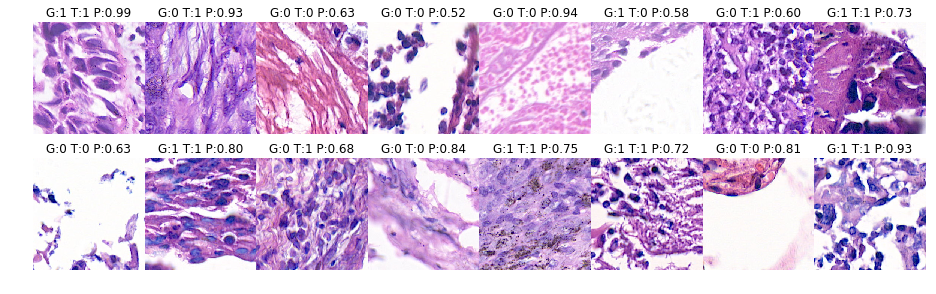

In [57]:
with torch.no_grad():
    img, label = next(g)
    img = img.cuda()
    pred = model(img)
    _, p_label = pred.topk(1,1,True,True)
#     print(pred)
    grid = vutils.make_grid(img.cpu())

fg, ax = plt.subplots(2, 8, figsize=(16,5))
for i in range(16):
    row = i // 8
    col = i % 8
#     print(row, col)
    ax[row, col].imshow(img[i].permute(1, 2, 0))
    ax[row, col].set_title(f'G:{label[i]} T:{p_label[i].item()} P:{torch.nn.functional.softmax(pred[i]).max():.2f}')
    ax[row, col].axis('off')
plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()